In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('../datasets/depression_dataset_reddit_cleaned.csv')
df2 = pd.read_csv('../datasets/dataset2.csv')

(df1.shape[0]+df2.shape[0])

13737

preprocessing function---->

In [2]:
import spacy
import re
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


def preprocess(text):
    text = re.sub(r'[ \n\d\W]+'," ",text).lower()
    text = remove_emojis(text)
    doc = nlp(text)
    
    filtered_tokens = []
    for token in doc:
        if not(token.is_stop or token.is_punct):
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)



In [3]:
df2['text']=df2.text.apply(preprocess)

In [4]:
df1['text'] = df1.text.apply(preprocess)

In [5]:
def change_label(label):
    if label == 1 or label == 0:
        return 1
    if label == 2:
        return 0

In [6]:
df2['labels'] = df2.labels.apply(change_label)

In [7]:
df1.head()

,text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression s check post place moment...,1
2,instead sleep depress stay night avoid day com...,1
3,ve kind stuff lot life delay inevitable have w...,1
4,sleep great comforting escape wake day literal...,1


In [8]:
df2.head()

,pid,text,labels
0,train_pid_7991,point genuinely curious sort shit throw way s ...,1
1,train_pid_7992,literally try m f amp ked drop good news nadda...,1
2,train_pid_7995,m struggle don t know start thing like ll star...,1
3,train_pid_7996,med aren t make depression well late don t kno...,1
4,train_pid_7997,hi m unwell m vice ride think go go voc tech h...,1


In [9]:
df2.pop('pid')
df2.rename( columns = {'labels':'is_depression'}, inplace = True )

In [10]:
df2.head()

,text,is_depression
0,point genuinely curious sort shit throw way s ...,1
1,literally try m f amp ked drop good news nadda...,1
2,m struggle don t know start thing like ll star...,1
3,med aren t make depression well late don t kno...,1
4,hi m unwell m vice ride think go go voc tech h...,1


In [11]:
df1[df1.is_depression == 1].count()

text             3831
is_depression    3831
dtype: int64

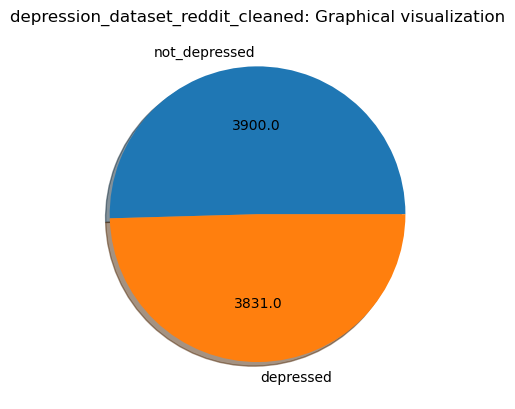

In [12]:
import matplotlib.pyplot as plt
not_depressed = df1.is_depression[df1.is_depression == 0].count()
depressed = df1.is_depression[df1.is_depression == 1].count()
y = np.array([not_depressed , depressed])
def absolute_value(val):
    a  = np.round(val/100.*y.sum(), 0)
    return a

plt.pie(y , labels = ["not_depressed" , "depressed"],autopct=absolute_value, shadow=True)
plt.title("depression_dataset_reddit_cleaned: Graphical visualization")
plt.show() 

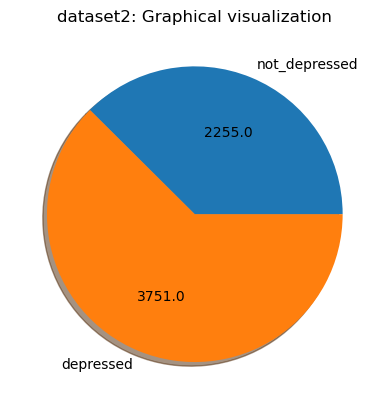

In [13]:
not_depressed = df2.is_depression[df2.is_depression == 0].count()
depressed = df2.is_depression[df2.is_depression == 1].count()
y = np.array([not_depressed , depressed])
def absolute_value(val):
    a  = np.round(val/100.*y.sum(), 0)
    return a

plt.pie(y , labels = ["not_depressed" , "depressed"],autopct=absolute_value, shadow=True)
plt.title("dataset2: Graphical visualization")
plt.show() 

In [14]:
df = pd.concat([df1,df2],ignore_index = True)
data = df.copy()


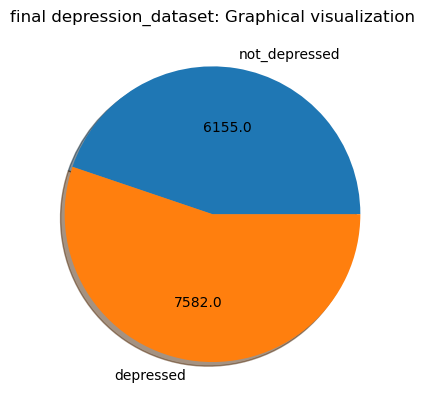

In [15]:
not_depressed = data.is_depression[data.is_depression == 0].count()
depressed = data.is_depression[data.is_depression == 1].count()
y = np.array([not_depressed , depressed])
def absolute_value(val):
    a  = np.round(val/100.*y.sum(), 0)
    return a

plt.pie(y , labels = ["not_depressed" , "depressed"],autopct=absolute_value, shadow=True)
plt.title("final depression_dataset: Graphical visualization")
plt.show() 